# Deep Learning - MNIST Beispiel

In [1]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

test_labels_ori = test_labels

print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr. 5: {}".format(train_labels[5]))


Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Label zu Bild Nr. 5: 2


In [2]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))


Trainingsdatensatz:(60000, 28, 28, 1)
Testdatensatz:(10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


In [4]:
train_images.shape

(60000, 28, 28, 1)

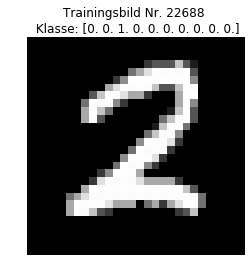

In [6]:
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,60000)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex,train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [7]:
import os
import numpy as np

In [8]:

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


In [9]:
mnist_inputshape = train_images[0].shape
mnist_inputshape

(28, 28, 1)

In [10]:
basedir = r"D:/logs"
LOGDIR = os.path.join(basedir,"tb_logs")



In [11]:
my_tensorboard = TensorBoard(log_dir = LOGDIR,
                             histogram_freq=0,
                            write_graph=True,
                            write_images=True)

In [12]:
TensorBoard?

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5), 
                activation = 'relu',
                input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(5,5),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
features (Dense)             (None, 128)               131200    
__________

In [14]:
my_batch_size = 128
my_num_classes = 10
my_epochs = 12

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])



In [112]:
history = model.fit(train_images,train_labels,
         batch_size=my_batch_size,
         callbacks=[my_tensorboard],
         epochs=my_epochs,
         verbose=1,
         validation_data=(test_images,test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.3730 - acc: 0.8801 - val_loss: 0.0554 - val_acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1082 - acc: 0.9675 - val_loss: 0.0363 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0796 - acc: 0.9767 - val_loss: 0.0316 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0280 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0620 - acc: 0.9820 - val_loss: 0.0289 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0536 - acc: 0.9839 - val_loss: 0.0226 - val_acc: 0.9925
Epoch 7/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0490 - acc: 0.9855 - val_loss: 0.0194 - va

In [113]:
history

In [114]:
score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

10000/10000 [==============================] - 6s 650us/step
Test Verlust: 0.0206829725912
Test Genauigkeit: 0.994
